# Lecture 5

## Exercise 5.1

The Hydrogen wave functions for the states 1s and 2p are:
$$\Psi_{1,0,0}(x,y,z)=\dfrac{a_0^{-3/2}}{\sqrt{\pi}} \exp{\left(-\dfrac{x^2+y^2+z^2}{a_0}\right)}$$

$$\Psi_{2,1,0}(x,y,z)=\dfrac{a_0^{-5/2}}{8}\sqrt{\dfrac{2}{\pi}} z \exp{\left(-\dfrac{x^2+y^2+z^2}{2a_0}\right)}$$

where $a_0=0,0529$ $nm$ is the Bohr radius. Expectation values for the radius are:

$$ <r>_{\Psi_{1,0,0}}=\frac{3}{2}a_0 \quad <r>_{\Psi_{2,1,0}}=5a_0 $$

We want to calculate these $<r>$ sampling the probability distribution $|\Psi|^2$ using the Metropolis algorithm, both with a uniform $T(\vec{x}|\vec{y})$ and a normal one. The step lenghts are $l_{1,0,0}=a_0$ and $l_{2,1,0}=2a_0$ respectively. For the state $(1,0,0)$ we start in the origin, for the $(2,1,0)$ we start in $\vec{r}=(0,0,1)$. The actual simulation consists of $10^6$ steps divided into 500 blocks. The equilibration consists of $10^4$ steps (shown in a 3D scatter plot).

### Uniform distribution

Each component of $\vec{r_n}$ is taken from a uniform distribution centered on the corresponding component of $\vec{r_{n-1}}$ with radius $l$ (i.e. $x_n \in [x_{n-1}-l,x_{n-1}+l]$). In order to sample uniformly the solid angle, we accept the new point only if it lays inside the circle of radius $l$, then we test it with Metropolis Algorithm. This criterion satisfy the "$50\%$ empirical rule" ($48,7\%$ points accepted for the $1s$ state, $55,7\%$ for the $2p$).

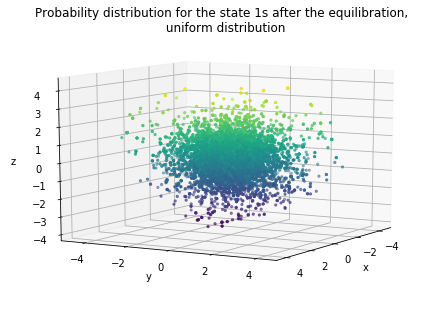

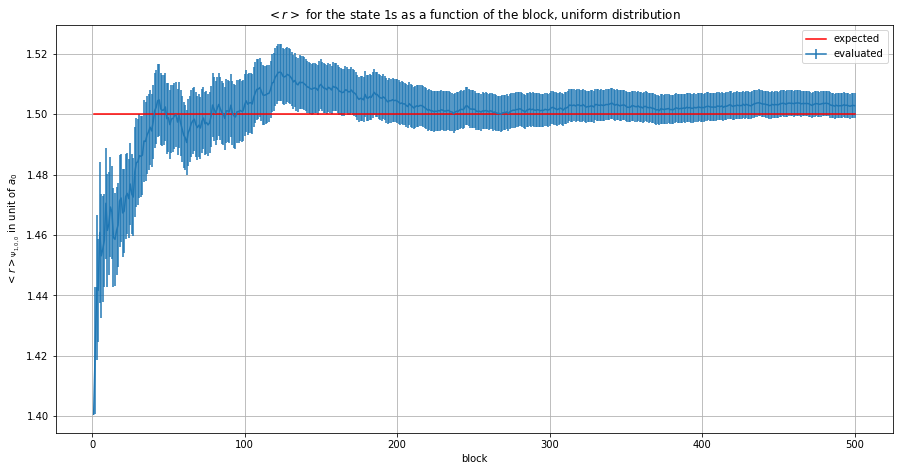

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

a0=0.0529e-9
x,y,z=np.loadtxt("es5.1/Origin/uni100.txt", usecols=(0,1,2), delimiter=" ", unpack=True)
block,r,err=np.loadtxt("es5.1/Origin/PSI100_uniform.txt", usecols=(0,1,2), delimiter=" ", unpack='true')

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Probability distribution for the state 1s after the equilibration, \n uniform distribution")
ax.view_init(10, 30)
plt.show()

plt.figure(0,figsize=(15,7.5))
expected=np.zeros(len(block))
expected.fill(1.5)
plt.plot(block,expected,color='red',label='expected')
plt.errorbar(block,r,yerr=err,label='evaluated')
plt.title("$<r>$ for the state 1s as a function of the block, uniform distribution")
plt.xlabel('block')
plt.ylabel(r'$<r>_{\Psi_{1,0,0}}$ in unit of $a_0$')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

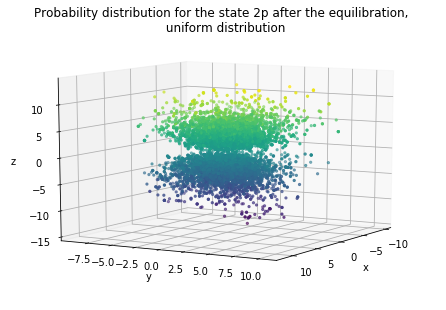

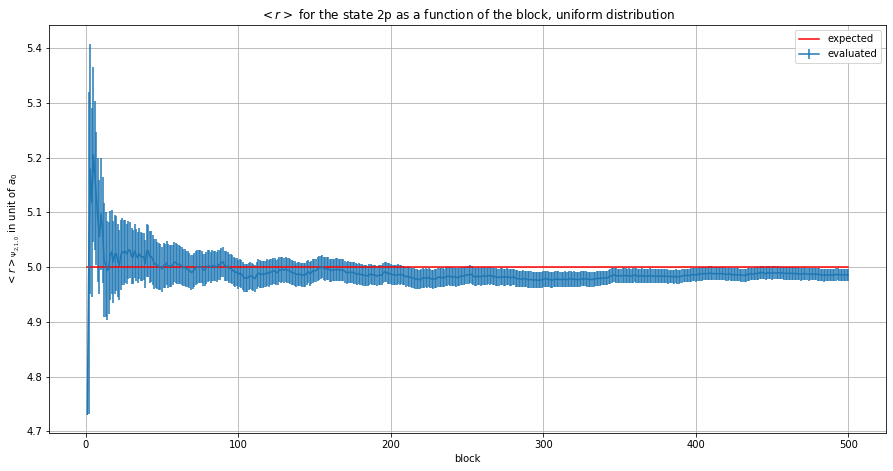

In [20]:
x,y,z=np.loadtxt("es5.1/Origin/uni210.txt", usecols=(0,1,2), delimiter=" ", unpack=True)
block,r,err=np.loadtxt("es5.1/Origin/PSI210_uniform.txt", usecols=(0,1,2), delimiter=" ", unpack='true')

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Probability distribution for the state 2p after the equilibration, \n uniform distribution")
ax.view_init(10, 30)
plt.show()

plt.figure(0,figsize=(15,7.5))
expected=np.zeros(len(block))
expected.fill(5)
plt.plot(block,expected,color='red',label='expected')
plt.errorbar(block,r,yerr=err,label='evaluated')
plt.title("$<r>$ for the state 2p as a function of the block, uniform distribution")
plt.xlabel('block')
plt.ylabel(r'$<r>_{\Psi_{2,1,0}}$ in unit of $a_0$')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

### Normal distribution

Each component of $\vec{r_n}$ is taken from a normal distribution centered on the corresponding component of $\vec{r_{n-1}}$ and $\sigma=l/2$ (i.e $x_n \sim N(x_{n-1},l/2))$. Again, we check if $|\Delta \vec{r}|<l$. We get $47,3\%$ accepted point for the $1s$ state, $54,7\%$ for the $2p$.

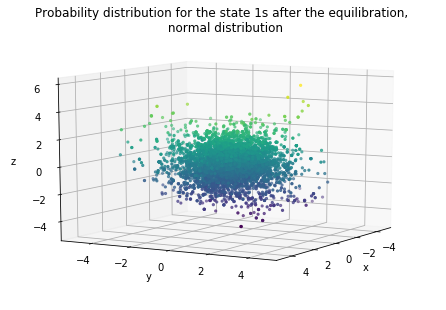

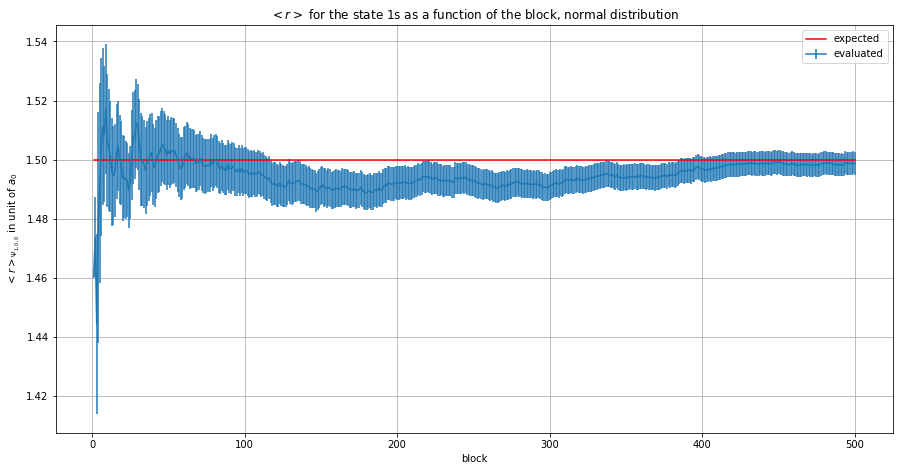

In [21]:
x,y,z=np.loadtxt("es5.1/Origin/gauss100.txt", usecols=(0,1,2), delimiter=" ", unpack=True)
block,r,err=np.loadtxt("es5.1/Origin/PSI100_gauss.txt", usecols=(0,1,2), delimiter=" ", unpack='true')

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Probability distribution for the state 1s after the equilibration, \n normal distribution")
ax.view_init(10, 30)
plt.show()

plt.figure(0,figsize=(15,7.5))
expected=np.zeros(len(block))
expected.fill(1.5)
plt.plot(block,expected,color='red',label='expected')
plt.errorbar(block,r,yerr=err,label='evaluated')
plt.title("$<r>$ for the state 1s as a function of the block, normal distribution")
plt.xlabel('block')
plt.ylabel(r'$<r>_{\Psi_{1,0,0}}$ in unit of $a_0$')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

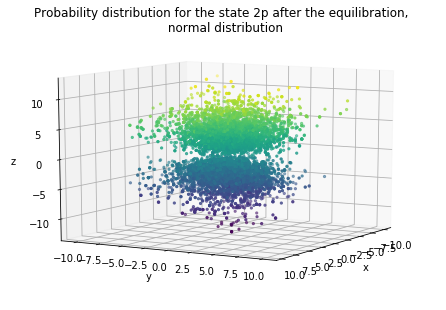

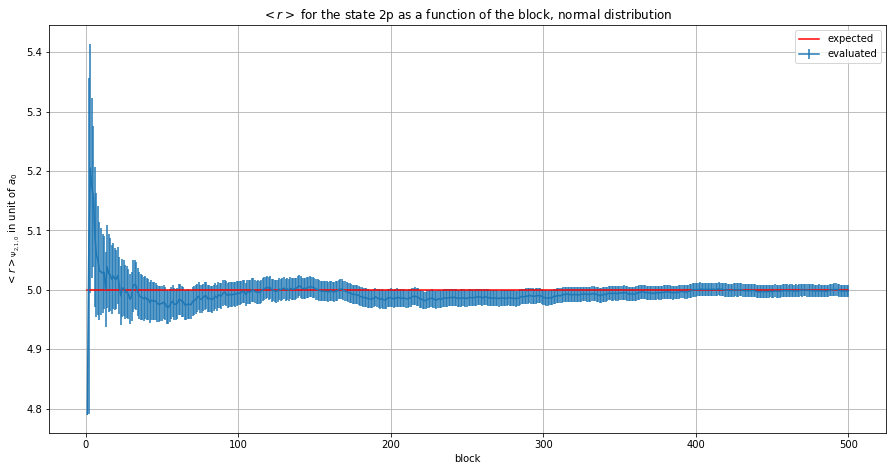

In [22]:
x,y,z=np.loadtxt("es5.1/Origin/gauss210.txt", usecols=(0,1,2), delimiter=" ", unpack=True)
block,r,err=np.loadtxt("es5.1/Origin/PSI210_gauss.txt", usecols=(0,1,2), delimiter=" ", unpack='true')

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Probability distribution for the state 2p after the equilibration, \n normal distribution")
ax.view_init(10, 30)
plt.show()

plt.figure(0,figsize=(15,7.5))
expected=np.zeros(len(block))
expected.fill(5)
plt.plot(block,expected,color='red',label='expected')
plt.errorbar(block,r,yerr=err,label='evaluated')
plt.title("$<r>$ for the state 2p as a function of the block, normal distribution")
plt.xlabel('block')
plt.ylabel(r'$<r>_{\Psi_{2,1,0}}$ in unit of $a_0$')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

The two distributions, uniform and gaussian, gives the same results.

### Starting point far away from the origin

We now repeat the same simulation starting very far from the origin ($\vec{r}=(20,20,20)$).

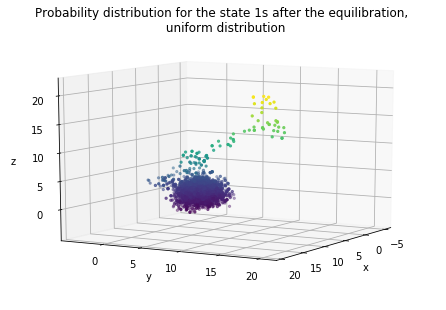

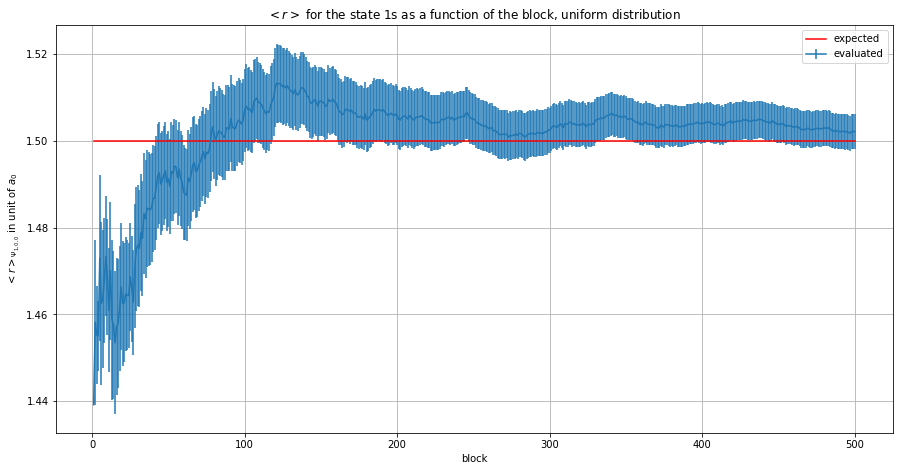

In [28]:
x,y,z=np.loadtxt("es5.1/Far/uni100.txt", usecols=(0,1,2), delimiter=" ", unpack=True)
block,r,err=np.loadtxt("es5.1/Far/PSI100_uniform.txt", usecols=(0,1,2), delimiter=" ", unpack='true')

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Probability distribution for the state 1s after the equilibration, \n uniform distribution")
ax.view_init(10, 30)
plt.show()

plt.figure(0,figsize=(15,7.5))
expected=np.zeros(len(block))
expected.fill(1.5)
plt.plot(block,expected,color='red',label='expected')
plt.errorbar(block,r,yerr=err,label='evaluated')
plt.title("$<r>$ for the state 1s as a function of the block, uniform distribution")
plt.xlabel('block')
plt.ylabel(r'$<r>_{\Psi_{1,0,0}}$ in unit of $a_0$')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

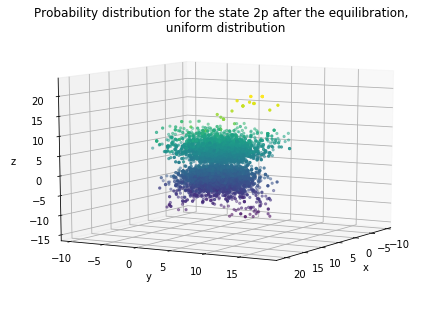

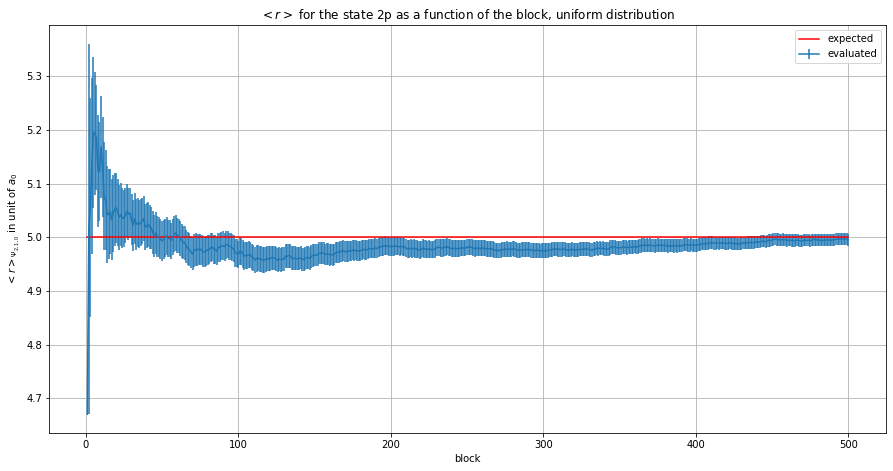

In [29]:
x,y,z=np.loadtxt("es5.1/Far/uni210.txt", usecols=(0,1,2), delimiter=" ", unpack=True)
block,r,err=np.loadtxt("es5.1/Far/PSI210_uniform.txt", usecols=(0,1,2), delimiter=" ", unpack='true')

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Probability distribution for the state 2p after the equilibration, \n uniform distribution")
ax.view_init(10, 30)
plt.show()

plt.figure(0,figsize=(15,7.5))
expected=np.zeros(len(block))
expected.fill(5)
plt.plot(block,expected,color='red',label='expected')
plt.errorbar(block,r,yerr=err,label='evaluated')
plt.title("$<r>$ for the state 2p as a function of the block, uniform distribution")
plt.xlabel('block')
plt.ylabel(r'$<r>_{\Psi_{2,1,0}}$ in unit of $a_0$')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

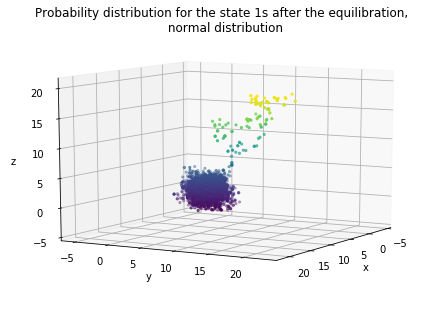

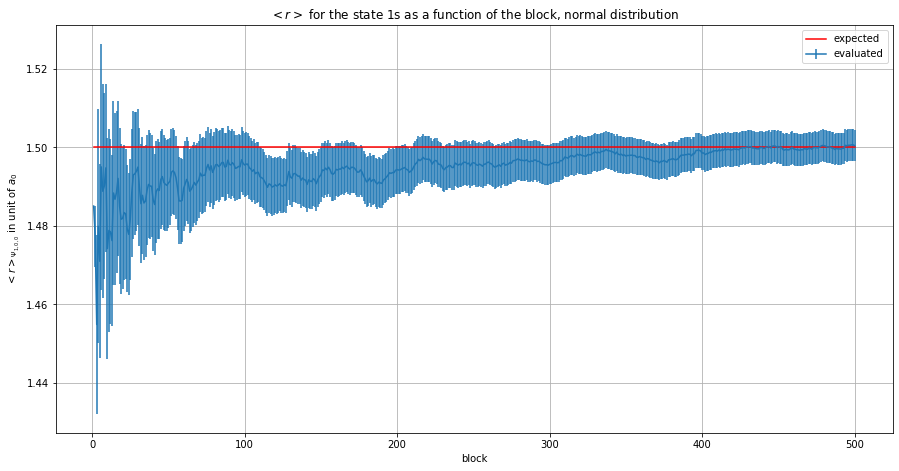

In [30]:
x,y,z=np.loadtxt("es5.1/Far/gauss100.txt", usecols=(0,1,2), delimiter=" ", unpack=True)
block,r,err=np.loadtxt("es5.1/Far/PSI100_gauss.txt", usecols=(0,1,2), delimiter=" ", unpack='true')

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Probability distribution for the state 1s after the equilibration, \n normal distribution")
ax.view_init(10, 30)
plt.show()

plt.figure(0,figsize=(15,7.5))
expected=np.zeros(len(block))
expected.fill(1.5)
plt.plot(block,expected,color='red',label='expected')
plt.errorbar(block,r,yerr=err,label='evaluated')
plt.title("$<r>$ for the state 1s as a function of the block, normal distribution")
plt.xlabel('block')
plt.ylabel(r'$<r>_{\Psi_{1,0,0}}$ in unit of $a_0$')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

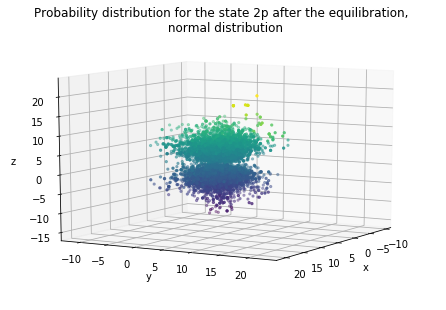

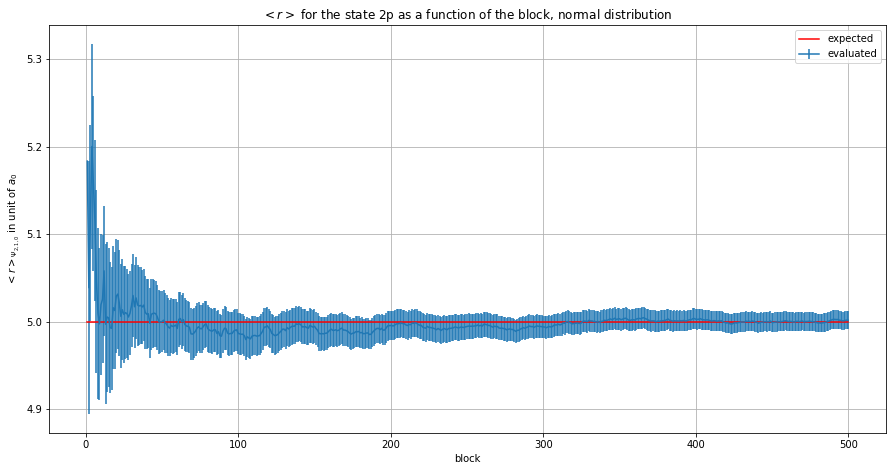

In [31]:
x,y,z=np.loadtxt("es5.1/Far/gauss210.txt", usecols=(0,1,2), delimiter=" ", unpack=True)
block,r,err=np.loadtxt("es5.1/Far/PSI210_gauss.txt", usecols=(0,1,2), delimiter=" ", unpack='true')

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Probability distribution for the state 2p after the equilibration, \n normal distribution")
ax.view_init(10, 30)
plt.show()

plt.figure(0,figsize=(15,7.5))
expected=np.zeros(len(block))
expected.fill(5)
plt.plot(block,expected,color='red',label='expected')
plt.errorbar(block,r,yerr=err,label='evaluated')
plt.title("$<r>$ for the state 2p as a function of the block, normal distribution")
plt.xlabel('block')
plt.ylabel(r'$<r>_{\Psi_{2,1,0}}$ in unit of $a_0$')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

We can see that the results are the same, but the equilibration takes longer.